# End-to-End Machine Learning Pipeline Assignment using MySQL and Streamlit-
# Iris

In [1]:
!pip install pymysql

In [2]:
# Establishing a connection for MySQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Refolin@2293', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM Iris.Iris"
    df = pd.read_sql(query, conn)

    # Display the results
    print('Connection successful. Here is your data :')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Connection successful. Here is your data :


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Connection closed succesfully !!!



# Context

The Iris dataset was used in R.A. Fisher's classic 1936 paper,It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

# Problem Statement:

The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers (Setosa, Versicolor, and Virginica). We want to understand the underlying patterns and relationships within this data.


# Objective:

To develop a classification model that accurately predicts the species of an Iris flower (Setosa, Versicolor, or Virginica) based on its sepal and petal measurements (sepal length, sepal width, petal length, and petal width). The model should leverage the inherent patterns and relationships within the data to achieve high predictive accuracy, especially considering the linear separability of one species and the non-linear separability of the other two. By fine-tuning model parameters and evaluating various classification algorithms, the goal is to build a robust and reliable model for Iris species prediction.

# Data dictionary

Id

SepalLengthCm - Length of the sepal (in cm)

SepalWidthCm- Width of the sepal (in cm)

PetalLengthCm- Length of the petal (in cm)

PetalWidthCm- Width of the petal (in cm)

Species- Species name

In [3]:
!pip install scikit-learn==1.3.0

     ---------------------------------------- 9.3/9.3 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [4]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

In [5]:
import sklearn
print(sklearn.__version__)

1.3.0


In [6]:
#!pip uninstall scikit-learn

In [7]:
#pip install scikit-learn==1.3.0

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

**observations:**
There are 150 rows and 6 columns.

In [10]:
#Checking the info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observations:**
All columns are in correct data type.


**Checking Null values**

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Observations:**
There are no null values in the dataset.

**Checking the Duplicate values**

In [12]:
df.duplicated().sum()

0

**Observations:**
There are no duplicate values in the data.

# Summary Statistics

In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Observations:**
We can observe that the mean and median of all columns are almost same, indicating the data distribution in all columns is symmetric.

In [14]:
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


**Observations:**
There are 3 species in the dataset.

# Exploratory data analysis(EDA)

**Univariate analysis**

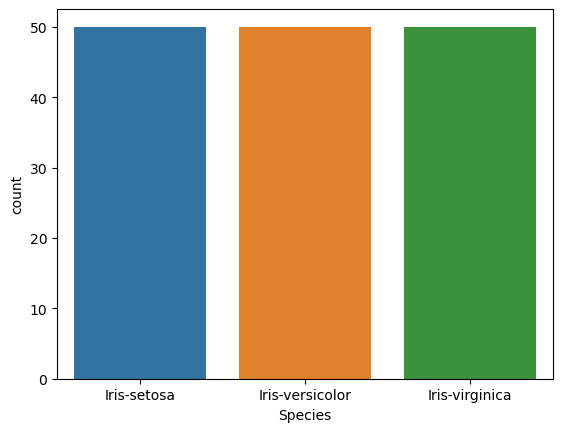

In [15]:
# Univariate analysis

sns.countplot(df['Species'])
plt.show()

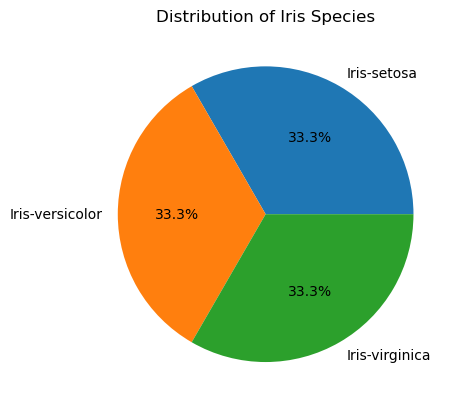

In [16]:
# Calculate the frequency of each species
species_counts = df['Species'].value_counts()

# Create the pie chart using the counts and labels
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Iris Species')
plt.show()

**Observation:**  The count plot and pie chart shows that each of the three Iris species – Setosa, Versicolor, and Virginica – are distributed equally in the dataset

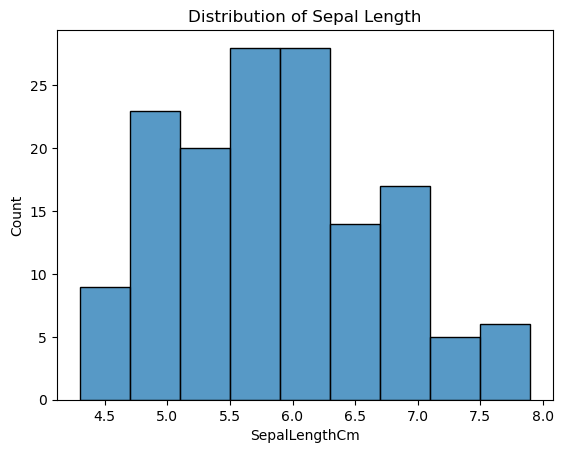

In [17]:
sns.histplot(df['SepalLengthCm'])
plt.title('Distribution of Sepal Length')
plt.show()

**Observation:**  The histplot of sepal length suggests that it is roughly normally distributed, with most flowers having sepal lengths between 5.5 and 6.0 cm. The data spans a range of 4.0 cm to 8.0 cm, and there might be a few potential outliers towards the higher end.

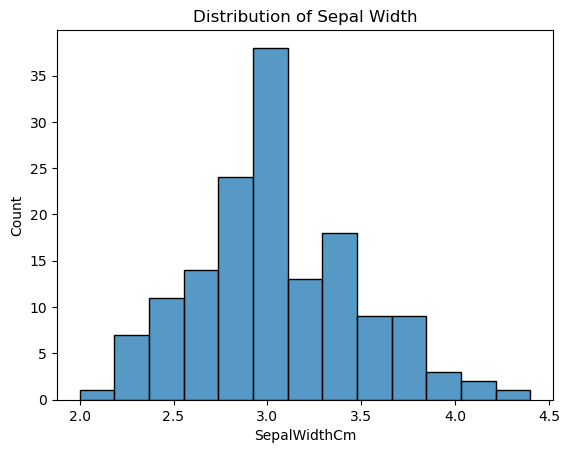

In [18]:
# Distribution of Sepal width

sns.histplot(df['SepalWidthCm'])
plt.title('Distribution of Sepal Width')
plt.show()

**Observation:** The histplot of sepal length suggests that,most flowers having sepal width between 2.5 and 3.5 cm. The highest sepal width is around 3cm.

**Bivatriate Analysis**

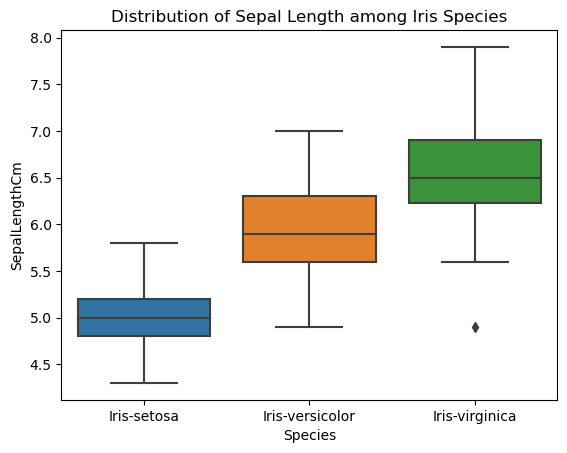

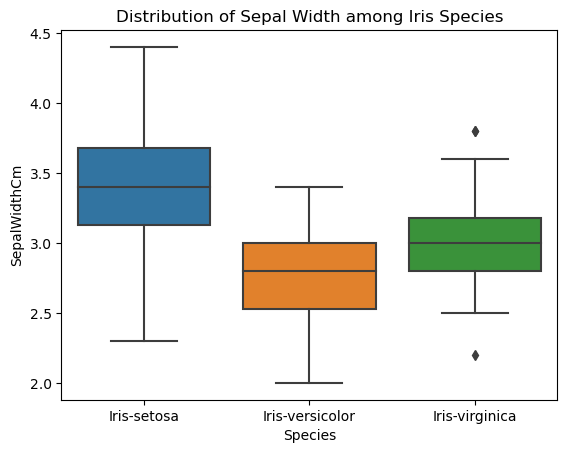

In [19]:

# Create box plots for sepal length
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Distribution of Sepal Length among Iris Species')
plt.show()

# Create box plots for sepal width
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Distribution of Sepal Width among Iris Species')
plt.show()

**Observations:**
* The box plots reveal clear differences in the distribution of sepal length and width among the Iris species.
* Setosa tends to have shorter sepal lengths and wider sepal widths compared to the other two species.
* Versicolor and Virginica have longer sepal lengths and narrower sepal widths, with Virginica generally having the longest sepal lengths.
* There are a few potential outliers for sepal length in Versicolor and Virginica, and potentially for sepal width in Virginica.

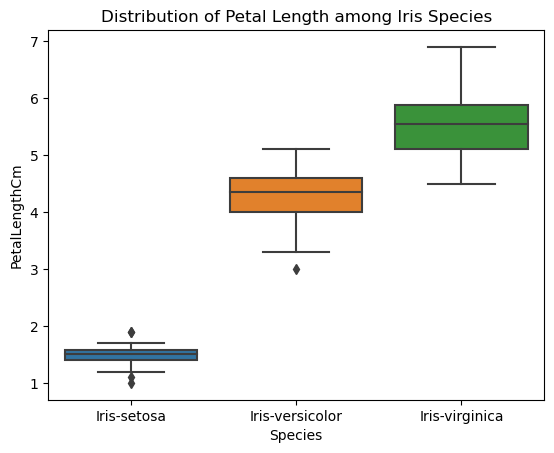

In [20]:
# distribution of petal length across species

sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Distribution of Petal Length among Iris Species')
plt.show()

**Interpreting the boxplot for petal length**

Setosa: The species setosa has the shortest petal length with a median around 1.5 and a relatively narrow IQR. There are some outliers for petal length in setosa.

Versicolor: The Versicolor species has a significantly longer petal length compared to Setosa, with a median around 4.5 cm and a wider IQR. There are a few potential outliers towards the lower end of the petal length range.

Virginica: The Virginica species has the longest petal length, with a median around 5.5 cm and the widest IQR. It also has no outliers.

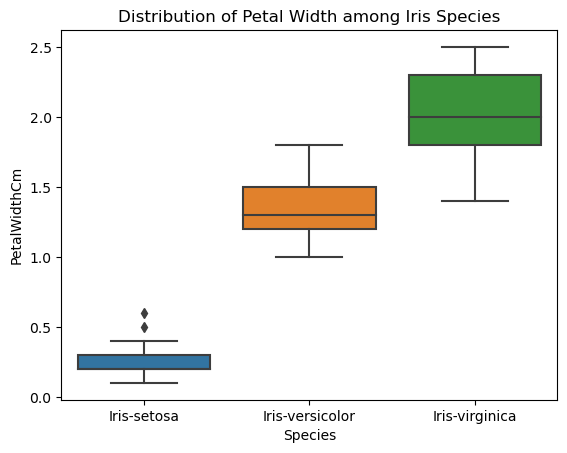

In [21]:
#Distribution of petal width across species.

sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Distribution of Petal Width among Iris Species')
plt.show()

**Interpreting the boxplot for petal width**

Setosa: The species setosa has the shortest petal width with a median, less than 0.5 and a relatively narrow IQR. There are some outliers towards upper end for petal width in setosa.

Versicolor: The Versicolor species has a significantly longer petal width compared to Setosa, with a median around 1.4 cm and a wider IQR. There are no outliers.

Virginica: The Virginica species has the longest petal width, with a median around 2 cm and the widest IQR. It also has no outliers.

**The differences in petal width among the Iris species- Setosa has the narrowest petals, followed by Versicolor, and Virginica has the widest petals.**


**Multi-variate Analysis**

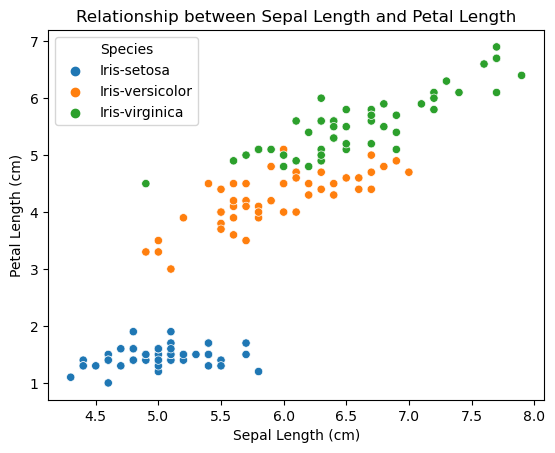

In [22]:
#Checking relationship between sepal length and petal length

sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

**Observations:**

* The scatterplot indicates a positive relationship between sepal length and petal length for Iris flowers.
* This relationship is particularly strong for the Setosa species.
* Versicolor and Virginica species exhibit some overlap, but Virginica generally has longer sepal and petal lengths.

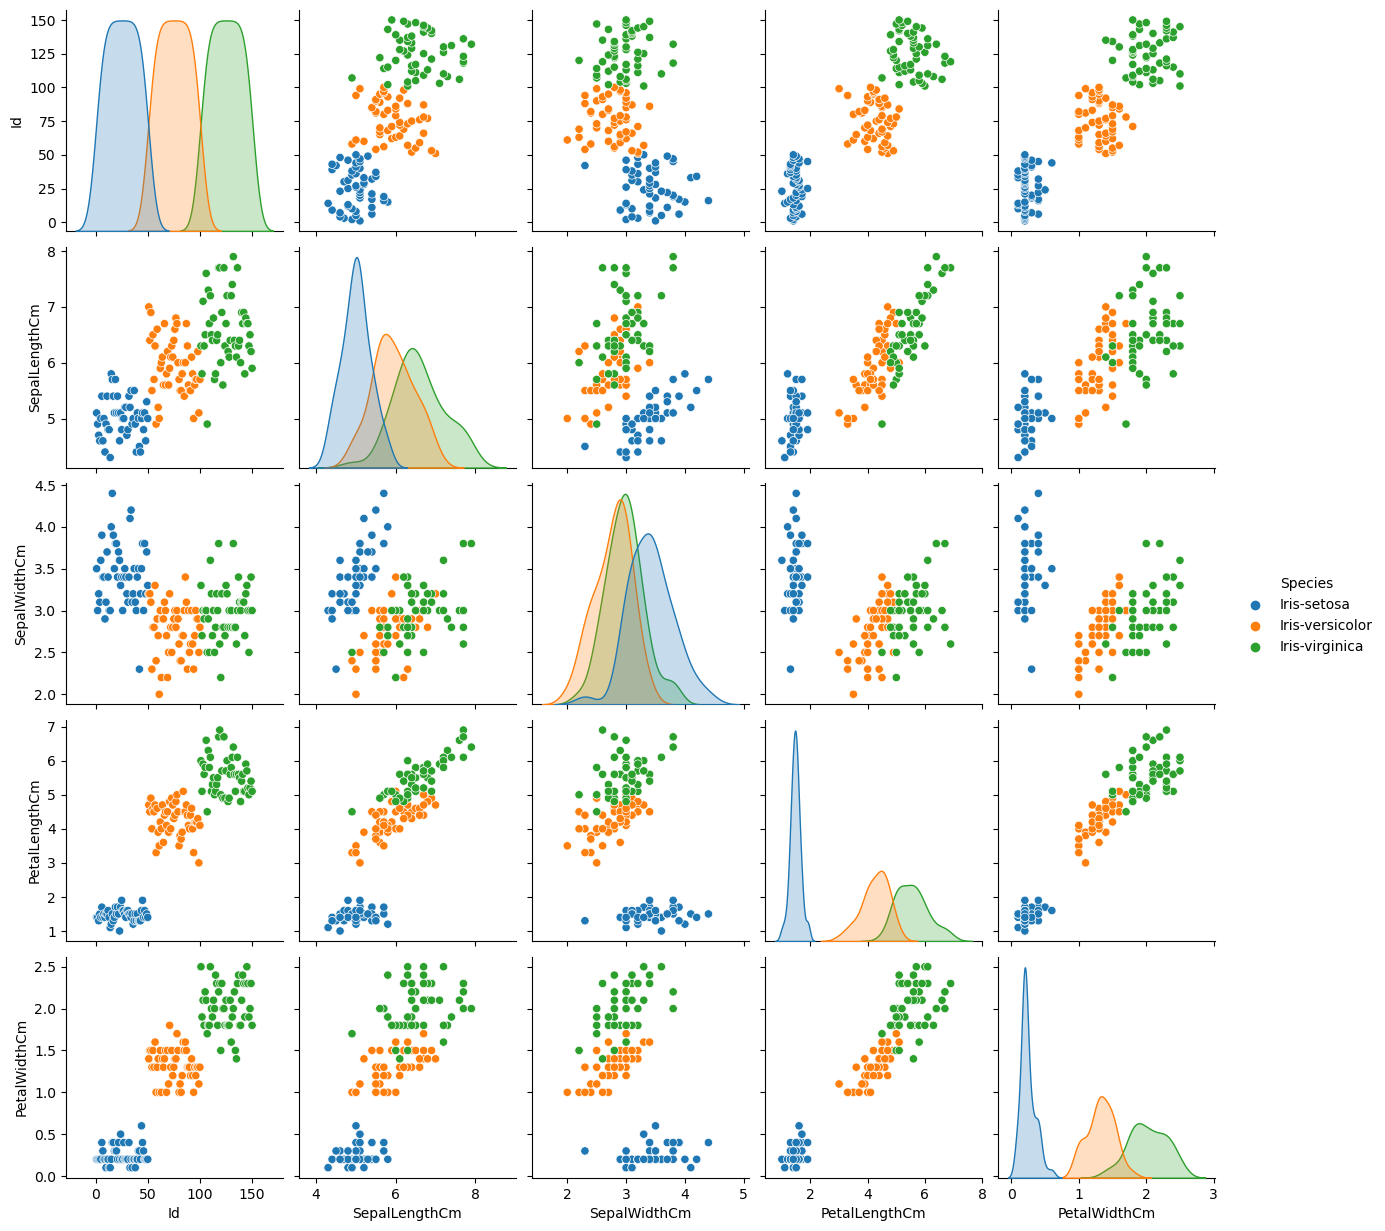

In [23]:
# Pairplot of sepal length, sepal width, petal length, petal width
sns.pairplot(df, hue='Species')
plt.show()

**Observations:**

* The pair plot reveals several interesting patterns in the pairwise relationships between features in the Iris dataset.
* There are strong positive correlations between sepal length, petal length, and petal width.  
* There's a weak negative correlation between sepal width and petal length/width.
* The relationships between features are often species-specific, with Setosa having distinct characteristics compared to Versicolor and Virginica.

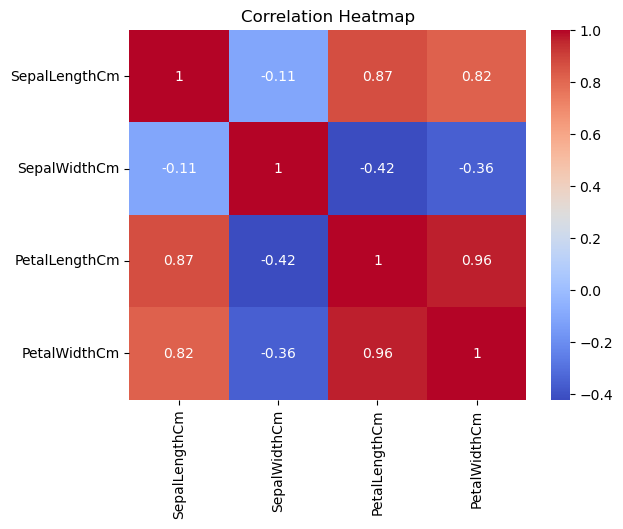

In [24]:
# Heatmap for correlation

sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

* Petal length and width are highly positively correlated(.096).

* Sepal length is positively correlated with petal length and width(0.87 and 0.82) respectively.
* Sepal width shows a negative correlation with petal length and width(-0.43 and -0.37) respectively.
* Sepal length and sepal width have a weak correlation(-0.11).

**Checking difference between Iris species based on sepal and petal measurements**

In [25]:
df=df.drop('Id',axis=1)
species_means = df.groupby('Species').mean()
species_means

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


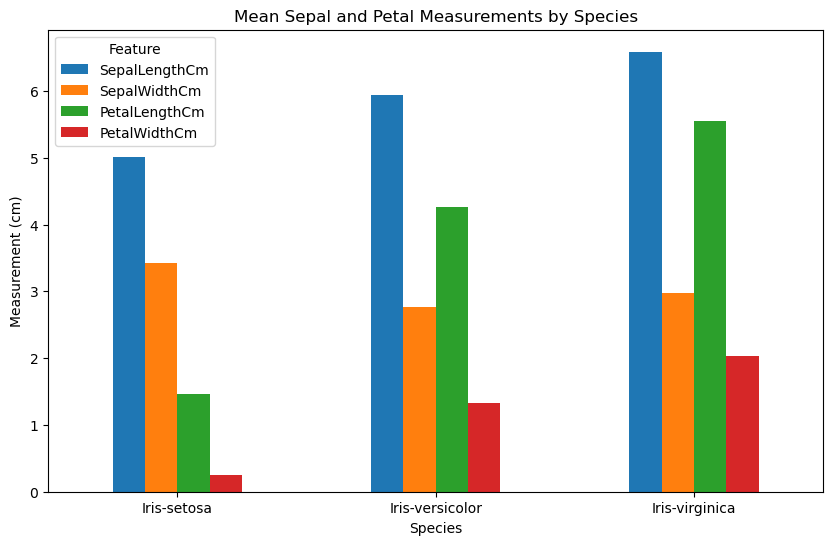

In [26]:
#Plotting species means

species_means.plot(kind='bar', figsize=(10, 6))  # Adjust figsize as needed
plt.title('Mean Sepal and Petal Measurements by Species')
plt.ylabel('Measurement (cm)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Feature')
plt.show()

**Observations:**

* Petal Length & Width: Most distinguishing features, showing clear differences between species. Setosa has the smallest, Virginica the largest, and Versicolor in between.
* Sepal Length: Provides additional clues, with Virginica having the longest, followed by Versicolor, then Setosa.
* Sepal Width: Less informative for species differentiation.

# Pre-processing

In [27]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [28]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
97,6.2,2.9,4.3,1.3,1
96,5.7,2.9,4.2,1.3,1
40,5.0,3.5,1.3,0.3,0
56,6.3,3.3,4.7,1.6,1
109,7.2,3.6,6.1,2.5,2
120,6.9,3.2,5.7,2.3,2
83,6.0,2.7,5.1,1.6,1
78,6.0,2.9,4.5,1.5,1
61,5.9,3.0,4.2,1.5,1
127,6.1,3.0,4.9,1.8,2


# Model Building


# Segregating the input and output features

In [29]:
#Seperating the input and output features

X=df.drop('Species',axis=1)
y=df['Species']

# Performing Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaling =StandardScaler()
Scaled_X=scaling.fit_transform(X)

# Splitting the data into training and testing data

In [31]:
X_train,X_test,y_train,y_test=train_test_split(Scaled_X,y,test_size=0.2,random_state=45)

# Building the DecisionTreeclassifier model.

In [32]:
# Creating a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

**Taking predictions**

In [33]:
# Taking predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Model Evaluation

In [34]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 1.0
Testing Precision : 1.0
Testing Recall : 1.0
Testing F1 Score : 1.0


# Conclusion:

**The performance of Decision Tree model is accurate.**


# Saving the model


In [35]:
# Save the model (DecisionTreeClassifier())
with open('Decision_Tree_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

